In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.insert(0, "../../code-previous")

In [ ]:
import pandas as pd
import numpy as np
import operator

import peakutils

import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')

import operator


import pickle
from sklearn.feature_extraction.text import CountVectorizer

import plotly
import plotly.plotly as py
from plotly import tools

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

In [4]:
data_path = "/mnt/disks/vault/analysis-data/word-journey/all-data.pql"
data = pd.read_pickle(data_path)

In [5]:
len(data)

91892093

In [9]:
data_update = data[["Label","PubYear","Doctypes", "title_without_stopwords"]]
disciplines = ["Architecture","Art","Humanities, Multidisciplinary","Folklore","Medieval & Renaissance Studies","Asian Studies","Classics","Dance","Film, Radio, Television","History","History & Philosophy of Science","Literary Theory & Criticism","Literary Reviews","Literature","Literature, African, Australian, Canadian","Literature, American","Literature, British Isles","Literature, German, Dutch, Scandinavian","Literature, Romance","Literature, Slavic","Poetry","Music","Philosophy","Religion","Theater","Agriculture, Dairy & Animal Science","Agricultural Engineering","Agricultural Economics & Policy","Agriculture, Multidisciplinary","Agronomy","Horticulture","Soil Science","Allergy","Anatomy & Morphology","Anesthesiology","Anthropology","Audiology & Speech-Language Pathology","Behavioral Sciences","Biochemical Research Methods","Biochemistry & Molecular Biology","Biodiversity Conservation","Biophysics","Biotechnology & Applied Microbiology","Cardiac & Cardiovascular Systems","Peripheral Vascular Disease","Cell & Tissue Engineering","Cell Biology","Dentistry, Oral Surgery & Medicine","Dermatology","Developmental Biology","Emergency Medicine","Andrology","Endocrinology & Metabolism","Entomology","Ecology","Environmental Sciences","Environmental Studies","Evolutionary Biology","Fisheries","Food Science & Technology","Forestry","Gastroenterology & Hepatology","Critical Care Medicine","Primary Health Care","Medicine, General & Internal","Genetics & Heredity","Geriatrics & Gerontology","Gerontology","Health Care Sciences & Services","Health Policy & Services","Hematology","Immunology","Infectious Diseases","Integrative & Complementary Medicine","Medicine, Legal","Biology","Limnology","Marine & Freshwater Biology","Mathematical & Computational Biology","Medical Ethics","Medical Informatics","Medical Laboratory Technology","Microbiology","Mycology","Clinical Neurology","Neurosciences","Neuroimaging","Nursing","Nutrition & Dietetics","Obstetrics & Gynecology","Oncology","Ophthalmology","Orthopedics","Otorhinolaryngology","Paleontology","Parasitology","Pathology","Pediatrics","Chemistry, Medicinal","Pharmacology & Pharmacy","Physiology","Plant Sciences","Psychiatry","Public, Environmental & Occupational Health","Radiology, Nuclear Medicine & Medical Imaging","Rehabilitation","Reproductive Biology","Medicine, Research & Experimental","Respiratory System","Rheumatology","Sport Sciences","Substance Abuse","Surgery","Toxicology","Transplantation","Tropical Medicine","Urology & Nephrology","Veterinary Sciences","Virology","Ornithology","Zoology","Astronomy & Astrophysics","Chemistry, Applied","Chemistry, Multidisciplinary","Chemistry, Analytical","Chemistry, Inorganic & Nuclear","Chemistry, Organic","Chemistry, Physical","Crystallography","Electrochemistry","Geochemistry & Geophysics","Geology","Geosciences, Multidisciplinary","Mathematics, Applied","Mathematics, Interdisciplinary Applications","Mathematics","Statistics & Probability","Meteorology & Atmospheric Sciences","Mineralogy","Mining & Mineral Processing","Oceanography","Optics","Geography, Physical","Physics, Applied","Physics, Fluids & Plasmas","Physics, Atomic, Molecular & Chemical","Physics, Multidisciplinary","Physics, Condensed Matter","Physics, Nuclear","Physics, Particles & Fields","Physics, Mathematical","Polymer Science","Thermodynamics","Water Resources","Nanoscience & Nanotechnology","Logic","Multidisciplinary Sciences","Acoustics","Automation & Control Systems","Computer Science, Artificial Intelligence","Computer Science, Cybernetics","Computer Science, Hardware & Architecture","Computer Science, Information Systems","Computer Science, Interdisciplinary Applications","Computer Science, Software Engineering","Computer Science, Theory & Methods","Construction & Building Technology","Energy & Fuels","Engineering, Aerospace","Engineering, Multidisciplinary","Engineering, Biomedical","Engineering, Environmental","Engineering, Chemical","Engineering, Industrial","Engineering, Manufacturing","Engineering, Marine","Engineering, Civil","Engineering, Ocean","Engineering, Petroleum","Engineering, Electrical & Electronic","Engineering, Mechanical","Engineering, Geological","Ergonomics","Imaging Science & Photographic Technology","Information Science & Library Science","Instruments & Instrumentation","Materials Science, Paper & Wood","Materials Science, Ceramics","Materials Science, Multidisciplinary","Materials Science, Biomaterials","Materials Science, Characterization & Testing","Materials Science, Coatings & Films","Materials Science, Composites","Materials Science, Textiles","Mechanics","Metallurgy & Metallurgical Engineering","Microscopy","Nuclear Science & Technology","Operations Research & Management Science","Remote Sensing","Robotics","Spectroscopy","Telecommunications","Transportation","Transportation Science & Technology","Archaeology","Area Studies","Social Sciences, Biomedical","Business","Business, Finance","Economics","Industrial Relations & Labor","Management","Communication","Criminology & Penology","Cultural Studies","Demography","Education & Educational Research","Education, Scientific Disciplines","Education, Special","Ethnic Studies","Family Studies","Geography","Law","Political Science","International Relations","Linguistics","Language & Linguistics","Social Sciences, Mathematical Methods","Psychology, Biological","Psychology, Clinical","Psychology, Educational","Psychology, Developmental","Psychology, Applied","Psychology","Psychology, Multidisciplinary","Psychology, Psychoanalysis","Psychology, Mathematical","Psychology, Experimental","Psychology, Social","Planning & Development","Public Administration","Social Issues","Ethics","History of Social Sciences","Hospitality, Leisure, Sport & Tourism","Social Sciences, Interdisciplinary","Social Work","Sociology","Urban Studies","Women's Studies"]
data = data_update[data_update['Label'].isin(disciplines)]

In [10]:
print(len(data.Label.unique()))
print(len(data))

249
91892093


In [34]:
#data.head()

In [15]:
data_grouped_by_year_label = data[["Label","PubYear","title_without_stopwords"]].groupby(["Label","PubYear"])["title_without_stopwords"].apply(list)

In [16]:
data_grouped_by_year_label = pd.DataFrame(data_grouped_by_year_label)
data_grouped_by_year_label.head()

title_without_stopwords
Label     PubYear                                                   
Acoustics 1929     [hearing speech auditoriums, hearing speech au...
          1930     [reverberation time bridge  instrumental metho...
          1931     [some physical characteristics speech music, s...
          1932     [position finding under water sound signals, p...
          1933     [some notes character bell tones, some notes c...

In [17]:
data_grouped_by_year_label["cleaned_titles"] = data_grouped_by_year_label["title_without_stopwords"].apply(lambda x: list(set(x)))

In [18]:
data_grouped_by_year_label.head()

title_without_stopwords  \
Label     PubYear                                                      
Acoustics 1929     [hearing speech auditoriums, hearing speech au...   
          1930     [reverberation time bridge  instrumental metho...   
          1931     [some physical characteristics speech music, s...   
          1932     [position finding under water sound signals, p...   
          1933     [some notes character bell tones, some notes c...   

                                                      cleaned_titles  
Label     PubYear                                                     
Acoustics 1929     [psychological measurements annoyance related ...  
          1930     [theory horn type loud speaker, discussion sym...  
          1931     [microphone technique radio broadcasting, orga...  
          1932     [acoustic pick up philadelphia orchestra broad...  
          1933     [sound absorption non reactive mixtures, deter...

In [26]:
# clean up the title

def num_there(w):
    return any(i.isdigit() for i in w)


def clean_digits(s):
    t = s.split()
    cleaned = " ".join([x for x in t if not num_there(x)])
    return cleaned

data_grouped_by_year_label = data_grouped_by_year_label.reset_index()
data_grouped_by_year_label["title_words_"] = data_grouped_by_year_label["cleaned_titles"].progress_apply(lambda x: " ".join(x))

Progress: 100%|██████████| 19980/19980 [00:15<00:00, 1262.50it/s]


In [28]:
data_grouped_by_year_label["title_words"] = data_grouped_by_year_label["title_words_"].progress_apply(lambda x: clean_digits(x))

Progress: 100%|██████████| 19980/19980 [10:21<00:00, 32.15it/s]  


In [5]:
filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/word-journey-data.pql"
#data_grouped_by_year_label.to_pickle(filename)


data_grouped_by_year_label = pd.read_pickle(filename)

In [6]:
data_grouped_by_year_label.head()

,index,Label,PubYear,title_without_stopwords,cleaned_titles,title_words_,title_words
0,0,Acoustics,1929,"[hearing speech auditoriums, hearing speech au...",[psychological measurements annoyance related ...,psychological measurements annoyance related p...,psychological measurements annoyance related p...
1,1,Acoustics,1930,[reverberation time bridge instrumental metho...,"[theory horn type loud speaker, discussion sym...",theory horn type loud speaker discussion sympo...,theory horn type loud speaker discussion sympo...
2,2,Acoustics,1931,"[some physical characteristics speech music, s...","[microphone technique radio broadcasting, orga...",microphone technique radio broadcasting organ ...,microphone technique radio broadcasting organ ...
3,3,Acoustics,1932,"[position finding under water sound signals, p...",[acoustic pick up philadelphia orchestra broad...,acoustic pick up philadelphia orchestra broadc...,acoustic pick up philadelphia orchestra broadc...
4,4,Acoustics,1933,"[some notes character bell tones, some notes c...","[sound absorption non reactive mixtures, deter...",sound absorption non reactive mixtures determi...,sound absorption non reactive mixtures determi...


In [7]:
tovector_input = pd.DataFrame(data_grouped_by_year_label[["Label", "title_words"]].groupby(data_grouped_by_year_label.Label)["title_words"].apply(list))
tovector_input["words"] = tovector_input["title_words"].progress_apply(lambda x: " ".join(x))

Progress: 100%|██████████| 249/249 [00:03<00:00, 66.63it/s]


In [35]:
len(tovector_input)

249

In [9]:
tovector_input.head()

,title_words,words
Label,,
Acoustics,[psychological measurements annoyance related ...,psychological measurements annoyance related p...
Agricultural Economics & Policy,[methods maintaining fertility successful jers...,methods maintaining fertility successful jerse...
Agricultural Engineering,[studies high temperature drying discoloration...,studies high temperature drying discoloration ...
"Agriculture, Dairy & Animal Science",[propionic acid sodium propionate calcium prop...,propionic acid sodium propionate calcium propi...
"Agriculture, Multidisciplinary",[variation chemical composition mangels bearin...,variation chemical composition mangels bearing...


In [11]:
vectorizer = CountVectorizer()
vectorized_words = vectorizer.fit_transform(tovector_input.words)

In [12]:
count_vocab = {value:key for key,value in vectorizer.vocabulary_.items()}
count_rev_dict = {value:key for key,value in vectorizer.vocabulary_.items()}
words = [count_rev_dict[i] for i in range(len(vectorizer.vocabulary_.keys()))]

In [13]:
vectorized_wordarray = vectorized_words.toarray()
document_frequency = (vectorized_wordarray != 0).sum(0).tolist()
document_frequency_log =  [np.log(x) for x in document_frequency]
#2. Term Frequency - Number of times in which a word appears in a document
term_frequency = vectorized_words.sum(axis=0).reshape(-1,).tolist()[0]
term_frequency_log = [np.log(x) for x in term_frequency]

In [ ]:
vectorized_wordarray.shape

In [15]:
data_grouped_by_year_label["word_count"] = data_grouped_by_year_label["title_words"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 19980/19980 [00:54<00:00, 364.08it/s] 


__Why don't we have the shape?__

In [46]:
def word_counts(discipline, word):
    
    
    disciplines = ['Physics, Applied',
                  'Physics, Fluids & Plasmas',
                  'Physics, Atomic, Molecular & Chemical',
                  'Physics, Multidisciplinary',
                  'Physics, Condensed Matter',
                  'Physics, Nuclear',
                  'Physics, Particles & Fields',
                  'Physics, Mathematical']
    
    #_data = data_grouped_by_year_label[data_grouped_by_year_label.Label == discipline]
    #_data["selected_word_count"] = _data["title_words"].apply(lambda x: x.split().count(word))
    # _data["normalized_selected_word_count"] = _data.apply(lambda x: x["selected_word_count"]/x["word_count"], axis=1) 

    _data = data_grouped_by_year_label[data_grouped_by_year_label.Label.isin(disciplines)]
    
    tmp = _data[["PubYear","title_words"]].groupby(_data.PubYear)["title_words"].apply(list).reset_index()
    #tmp = pd.DataFrame(tmp_)
    tmp["words_accumulated"] = tmp["title_words"].apply(lambda x: " ".join(x))
    tmp["selected_word_count"] = tmp["words_accumulated"].apply(lambda x: x.split().count(word))
    
    
    tmp["word_count"] = tmp["words_accumulated"].apply(lambda x: len(x.split()))
    tmp["normalized_selected_word_count"] = tmp.apply(lambda x: x["selected_word_count"]/x["word_count"], axis=1) 
    return tmp["PubYear"].tolist(), tmp["normalized_selected_word_count"].tolist()
    
foo, foo2 = word_counts('Chemistry, Physical',"quark")

In [47]:
years = []
frequencies= []

word_ = "quark"

disciplines = ["Physics, Applied"]

for discipline in tqdm(disciplines):
    
    _years, _freq = word_counts(discipline, word_) 
    
    years.append(_years)
    frequencies.append(_freq)

100%|██████████| 1/1 [00:07<00:00,  7.51s/it]


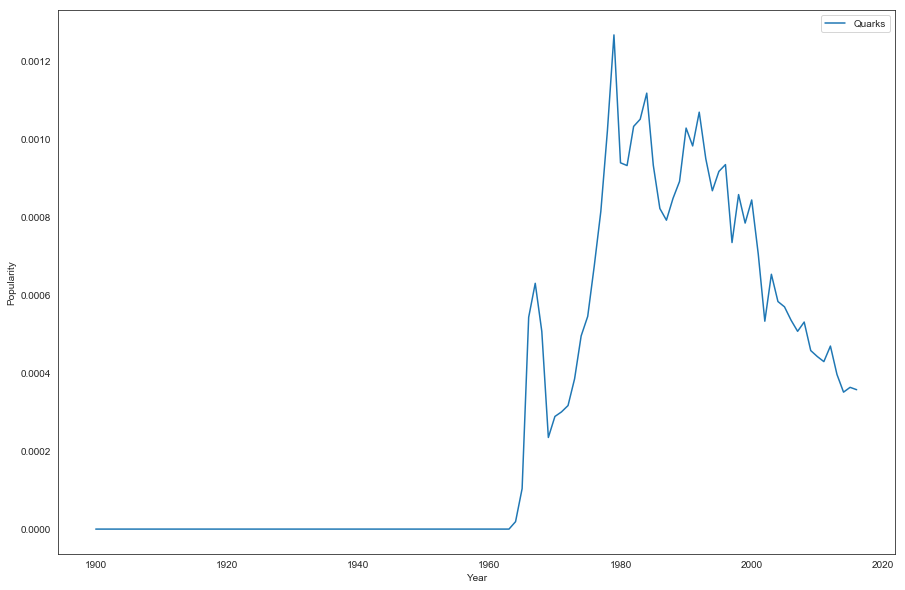

In [48]:
f = plt.figure(figsize=(15,10))

ax = f.add_subplot(111)

ax.plot(years[0],frequencies[0], label="Quarks")
ax.set_xlabel("Year")
ax.set_ylabel("Popularity")

ax.legend()

__Pick a few words and take the top 3 disciplines in which they occur__

In [69]:
def word_counts2(discipline, word):

    _data = data_grouped_by_year_label[data_grouped_by_year_label.Label == discipline]
    
    _data["selected_word_count"] = _data["title_words"].apply(lambda x: x.split().count(word))
    _data["normalized_selected_word_count"] = _data.apply(lambda x: float(x["selected_word_count"])/x["word_count"], axis=1) 
    
    return _data["PubYear"].tolist(), _data["normalized_selected_word_count"].tolist()
    
foo, foo2 = word_counts2('Chemistry, Physical',"alliin")

In [146]:
#word_ = "Dextromoramide"

word_ = "fermions"

index = words.index(word_)
count_rev_dict[index]
counts = vectorized_wordarray[:,index]

discipline_indices = [discipline_index for discipline_index in range(len(counts.tolist())) if counts[discipline_index] != 0]

counts_for_disciplines = {discipline_index: count for discipline_index, count in enumerate(counts.tolist())}
sorted_counts = sorted(counts_for_disciplines.items(), key=operator.itemgetter(1), reverse=True)
top_5_disciplines = [index for (index, count) in sorted_counts[:5]]

#disciplines = [list(tovector_input.index)[index] for index in discipline_indices]
disciplines = tovector_input.reset_index()["Label"]
present_dis = [disciplines[i] for i in top_5_disciplines]
print("Total disciplines present",len([count for i, count in enumerate(counts.tolist()) if count > 0]))
print("Present in:", present_dis)
print("Count:", len(disciplines))

Total disciplines present 34
Present in: ['Physics, Particles & Fields', 'Physics, Multidisciplinary', 'Astronomy & Astrophysics', 'Physics, Condensed Matter', 'Physics, Nuclear']
Count: 249


In [147]:
years = []
freqs = []

for dis in present_dis:
    
    _ys, _fqs = word_counts2(dis, word_)
    
    years.append(_ys)
    freqs.append(_fqs)

In [148]:
datatoplot = [go.Scatter(
            x=years[0],
            y=freqs[0],
            mode = 'lines+markers',
            name=present_dis[0],
    ),go.Scatter(
            x=years[1],
            y=freqs[1],
            mode='lines',
            name=present_dis[1],
    ),go.Scatter(
            x=years[2],
            y=freqs[2],
            mode='lines',
            name=present_dis[2],
    ),go.Scatter(
            x=years[3],
            y=freqs[3],
            mode='lines',
            name=present_dis[3],
    ),go.Scatter(
            x=years[4],
            y=freqs[4],
            mode='lines',
            name=present_dis[4]
    )]



layout = go.Layout(
    title='Word Propagation ' + word_,
    
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Popularity Ratio',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    )
)


fig1 = go.Figure(data=datatoplot, layout=layout)
py.iplot(fig1, filename='freq')

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [6]:
vectorizer = CountVectorizer()
vectorized_words = vectorizer.fit_transform(data_grouped_by_label.title_words)

# folder = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/word_selection_entropy"


# with open(folder + "/vectorizer.pickle", 'rb') as f:
#     vectorizer = pickle.load(f)
    
# with open(folder + "/vectorized_words.pickle", 'rb') as f:
#     vectorized_words = pickle.load(f)    

In [8]:
vectorized_wordarray = vectorized_words.toarray()
document_frequency = (vectorized_wordarray != 0).sum(0).tolist()
document_frequency_log =  [np.log(x) for x in document_frequency]
#2. Term Frequency - Number of times in which a word appears in a document
term_frequency = vectorized_words.sum(axis=0).reshape(-1,).tolist()[0]
term_frequency_log = [np.log(x) for x in term_frequency]

In [22]:
# what disciplines does the word appear in?

# angiopoietins, appalachia




In [23]:
disciplines = [list(data_grouped_by_label.index)[index] for index in discipline_indices]

In [24]:
len(disciplines)

26

In [25]:
disciplines

['Biochemical Research Methods',
 'Biochemistry & Molecular Biology',
 'Biophysics',
 'Biotechnology & Applied Microbiology',
 'Chemistry, Analytical',
 'Chemistry, Applied',
 'Chemistry, Inorganic & Nuclear',
 'Chemistry, Medicinal',
 'Chemistry, Multidisciplinary',
 'Chemistry, Organic',
 'Chemistry, Physical',
 'Crystallography',
 'Electrochemistry',
 'Engineering, Chemical',
 'Environmental Sciences',
 'Immunology',
 'Materials Science, Multidisciplinary',
 'Microbiology',
 'Multidisciplinary Sciences',
 'Nuclear Science & Technology',
 'Pharmacology & Pharmacy',
 'Physics, Atomic, Molecular & Chemical',
 'Physics, Multidisciplinary',
 'Radiology, Nuclear Medicine & Medical Imaging',
 'Spectroscopy',
 'Thermodynamics']

In [27]:
filtered_data = []

for discipline in disciplines:
    filtered_data.append(data[data.Label == discipline])

In [26]:
#data = None    

frequencies = []
for data_ in filtered_data:
    
    data_ = data_.sort_values(by="PubYear")
    
    data_grped_by_year = data_[["PubYear","title_without_stopwords"]].groupby(data.PubYear)["title_without_stopwords"].apply(list)
    data_grped_by_year = pd.DataFrame(data_grped_by_year)
    
    import ipdb
    ipdb.set_trace()
    
    data_grped_by_year["cleaned_titles"] = data_grped_by_year["title_without_stopwords"].apply(lambda x: list(set(x)))
    data_grped_by_year["before_distinct"] = data_grped_by_year["title_without_stopwords"].apply(lambda x: len(x))
    data_grped_by_year["after_distinct"] = data_grped_by_year["cleaned_titles"].apply(lambda x: len(x))

    
    data_grped_by_year["title_words_"] = data_grouped_by_label["cleaned_titles"].progress_apply(lambda x: " ".join(x))
    
    

KeyError: "['title_words'] not in index"

In [20]:
filtered_data = []

for discipline in disciplines:
    filtered_data.append(data[data.Label == discipline])
    
#data = None    

frequencies = []

for data_ in filtered_data:
    
    data_ = data_.sort_values(by="PubYear")
    vectorizer = CountVectorizer()
    vectorized_words = vectorizer.fit_transform(data_.title_without_stopwords)
    
    vocab = vectorizer.vocabulary_
    rev_vocab = {index:word for word,index in vocab.items()}
    
    row_counts = data_.groupby('PubYear').size().reset_index(name="count")
    counts =  list(row_counts["count"])
    
    word_index = vocab[word_]
    yearly_freq_for_word = []
    index_start = 0
    
    for i in range(len(row_counts)):
        
        offset = index_start + counts[i]
        tmp = vectorized_words[index_start:offset,:]
        yearly_word_freq = tmp.sum(axis=0).reshape(-1,).tolist()[0][word_index]
        
        ## Normalizing - Divide by number of physics articles in the year
        _tmp = float(yearly_word_freq) / counts[i]
        
        yearly_freq_for_word.append(_tmp)
        index_start = offset
        
    frequencies.append(yearly_freq_for_word)
    

KeyboardInterrupt: 

In [14]:
years = [sorted(_data.PubYear.unique()) for _data in filtered_data]

datatoplot = [go.Scatter(
            x=years[0],
            y=frequencies[0],
            mode='lines',
            name=disciplines[0],
    ),go.Scatter(
            x=years[1],
            y=frequencies[1],
            mode='lines',
            name=disciplines[1],
    ),go.Scatter(
            x=years[2],
            y=frequencies[2],
            mode='lines',
            name=disciplines[2],
    ),go.Scatter(
            x=years[3],
            y=frequencies[3],
            mode='lines',
            name=disciplines[3],
    ),go.Scatter(
            x=years[4],
            y=frequencies[4],
            mode='lines',
            name=disciplines[4],
    ),go.Scatter(
            x=years[5],
            y=frequencies[5],
            mode='lines',
            name=disciplines[5],
    ),go.Scatter(
            x=years[6],
            y=frequencies[6],
            mode='lines',
            name=disciplines[6],
    ),go.Scatter(
            x=years[7],
            y=frequencies[7],
            mode='lines',
            name=disciplines[7],
    ),go.Scatter(
            x=years[8],
            y=frequencies[8],
            mode='lines',
            name=disciplines[8],
    ),go.Scatter(
            x=years[9],
            y=frequencies[9],
            mode='lines',
            name=disciplines[9],
    ),go.Scatter(
            x=years[10],
            y=frequencies[10],
            mode='lines',
            name=disciplines[10],
    ),go.Scatter(
            x=years[11],
            y=frequencies[11],
            mode='lines',
            name=disciplines[11],
    ),go.Scatter(
            x=years[12],
            y=frequencies[12],
            mode='lines',
            name=disciplines[12],
    ),go.Scatter(
            x=years[13],
            y=frequencies[13],
            mode='lines',
            name=disciplines[13],
    ),go.Scatter(
            x=years[14],
            y=frequencies[14],
            mode='lines',
            name=disciplines[14],
    ),go.Scatter(
            x=years[15],
            y=frequencies[15],
            mode='lines',
            name=disciplines[15],
    ),go.Scatter(
            x=years[16],
            y=frequencies[16],
            mode='lines',
            name=disciplines[16],
    ),go.Scatter(
            x=years[17],
            y=frequencies[17],
            mode='lines',
            name=disciplines[17],
    ),go.Scatter(
            x=years[18],
            y=frequencies[18],
            mode='lines',
            name=disciplines[18],
    ),go.Scatter(
            x=years[19],
            y=frequencies[19],
            mode='lines',
            name=disciplines[19],
    ),go.Scatter(
            x=years[20],
            y=frequencies[20],
            mode='lines',
            name=disciplines[20],
    ),go.Scatter(
            x=years[21],
            y=frequencies[21],
            mode='lines',
            name=disciplines[21],
    ),go.Scatter(
            x=years[22],
            y=frequencies[22],
            mode='lines',
            name=disciplines[22],
    ),go.Scatter(
            x=years[23],
            y=frequencies[23],
            mode='lines',
            name=disciplines[23],
    )]



layout = go.Layout(
    title='Word Propagation ' + word_,
    
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Popularity Ratio',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    )
)



fig1 = go.Figure(data=datatoplot, layout=layout)
py.iplot(fig1, filename='freq')

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



__Frequently observed pattern: One of the disciplines picks it up and it goes up. examples - neutron, nanofossil__